# Customer churn Analysis

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import confusion_matrix, classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.models import load_model
# import joblib
# import os
import warnings
warnings.filterwarnings('ignore')
# import tensorflow as tf
# tf.random.set_seed(42)


In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
# getting categorical and numerical columns
cat_col = data.select_dtypes(include=['object']).columns.tolist()
num_data = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_data.remove('Exited')  # target variable
target = 'Exited'
print(f'Categorical columns: {cat_col}')
print(f'Numerical columns: {num_data}')
print(f'Length of Numerical variables: {len(num_data)}')
print(f"length of Categorical variables: {len(cat_col)}")


Categorical columns: ['Surname', 'Geography', 'Gender']
Numerical columns: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Length of Numerical variables: 10
length of Categorical variables: 3


For the employee churn record, there is a total of 10,000 input of data to work with and a total of 13 input variable in which 10 of them are numerical variables and only 3 are categorical variables.

## Data Exploration

**Missing Values**

In [5]:
data.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

There are no missing values in the dataset

In [6]:
data.duplicated().sum()

0

**Target Variable Distribution**

In [7]:
chart_1 = data[target].map({0:"No-churn", 1:"Churn"}).value_counts()
chart_2 = data[target].map({0:"No-churn", 1:"Churn"}).value_counts(normalize=True)

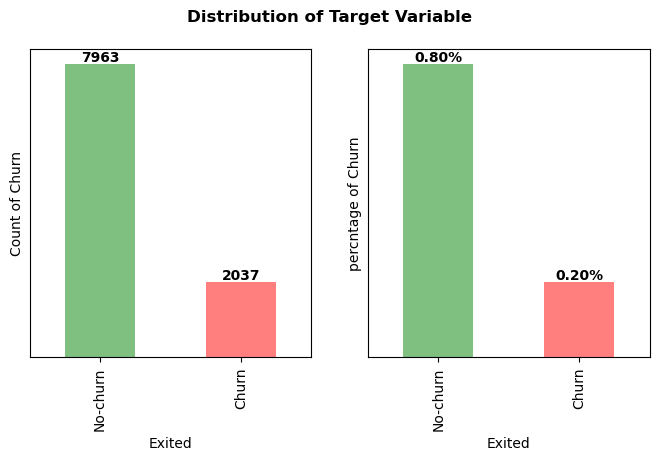

<Figure size 640x480 with 0 Axes>

In [8]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
chart_1.plot(kind='bar', ax=ax[0], color=['green', 'red'], alpha=0.5)
chart_2.plot(kind='bar', ax=ax[1], color=['green', 'red'], alpha=0.5)
for i, value in enumerate(chart_1.values):
    ax[0].text(i, value, f'{value}', ha='center', va='bottom',weight='bold')

for i, value in enumerate(chart_2.values):
    ax[1].text(i, value, f'{value:.2f}%', ha='center', va='bottom',weight='bold')

ax[0].set_yticks([])
ax[0].set_ylabel('Count of Churn')
ax[1].set_yticks([])
ax[1].set_ylabel('percntage of Churn')
plt.suptitle("Distribution of Target Variable", weight='bold')
plt.show()
plt.tight_layout()


From our chart above, about 20% of our dataset accounts for customers that have left (churn). This proves a dominance of one class over the other resulting to **data imbalance**.

**Categorical Variables**

In [9]:
# checking variable cardinality
for col in cat_col:
    print(f"number of labels in {col}: {data[col].nunique()}")

number of labels in Surname: 2932
number of labels in Geography: 3
number of labels in Gender: 2


We see here that The variable "Surname" has very high cardinality and will be dropped from our dataset before feeding it to our algorithm.

In [80]:
# get a temporary data containg the categorical variables and output variable
temp_data = data[['Geography', 'Gender', target]]

# Get the percentage customers that left by country
employee_churn_geo = temp_data.groupby('Geography')[target].mean().sort_values() * 100
employee_churn_gender = temp_data.groupby('Gender')[target].mean().sort_values() * 100

In [24]:
employee_churn_geo

Geography
France     16.154767
Spain      16.673395
Germany    32.443204
Name: Exited, dtype: float64

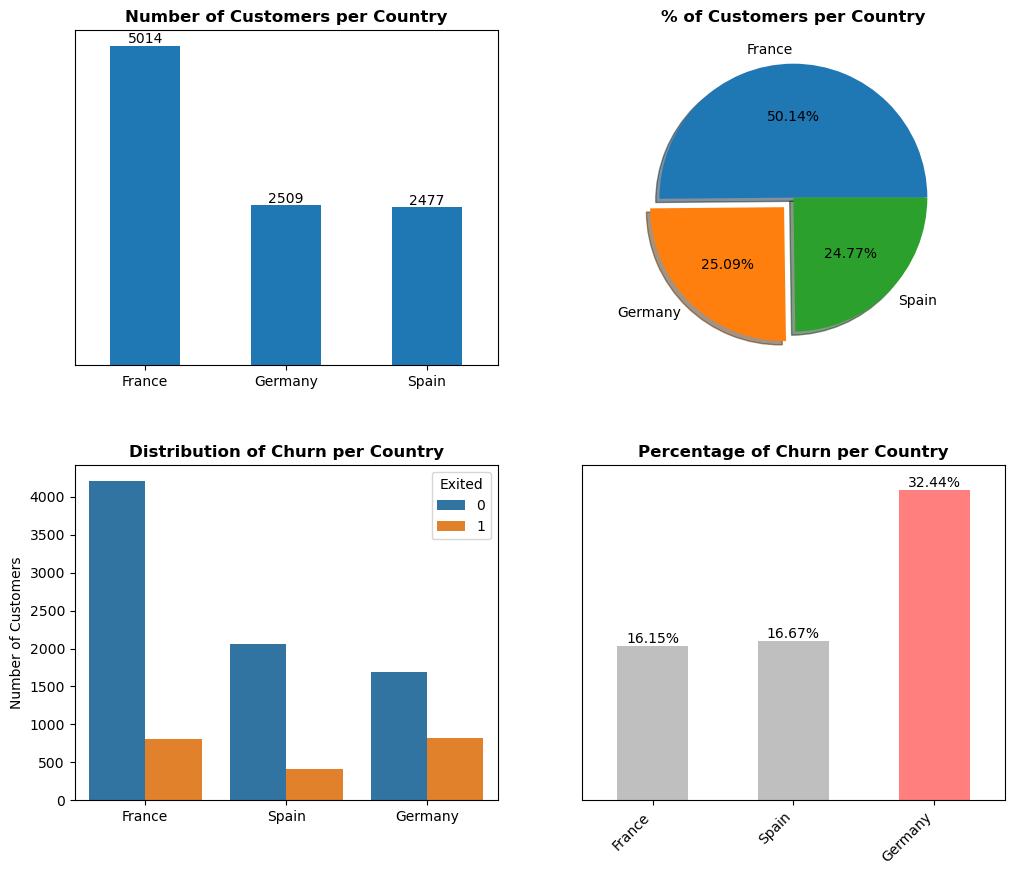

In [81]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=.3)

plt.subplot(2,2,1)
temp_data['Geography'].value_counts().plot(kind='bar')
for i, val in enumerate(temp_data['Geography'].value_counts().values):
    plt.text(i, val, f"{val}", ha='center', va='bottom')
plt.yticks([])
plt.xticks(rotation=0)
plt.xlabel('')
plt.title("Number of Customers per Country", weight='bold')

# pie chart for Customer per Country
plt.subplot(2,2,2)
temp_data['Geography'].value_counts().plot(kind='pie', explode=[0,0.1, 0], autopct='%1.2f%%', shadow=True)
plt.ylabel('')
plt.title("% of Customers per Country", weight='bold')

# chart for Distribution of Churn per country
plt.subplot(2,2,3)
sns.countplot(data=temp_data, x='Geography', hue=target)
plt.title("Distribution of Churn per Country", weight='bold')
plt.ylabel('Number of Customers')
plt.xlabel('')

plt.subplot(2,2,4)
color = ['grey', 'grey', 'red']
employee_churn_geo.plot(kind='bar', color=color, alpha=0.5)
for i, val in enumerate(employee_churn_geo.values):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom')
plt.yticks([])
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.title("Percentage of Churn per Country", weight='bold')
plt.ylim(0,35)


plt.show()

In [221]:
temp_data.query("Exited==1")['Geography'].value_counts(normalize=True) *100

Geography
Germany    39.960727
France     39.764359
Spain      20.274914
Name: proportion, dtype: float64

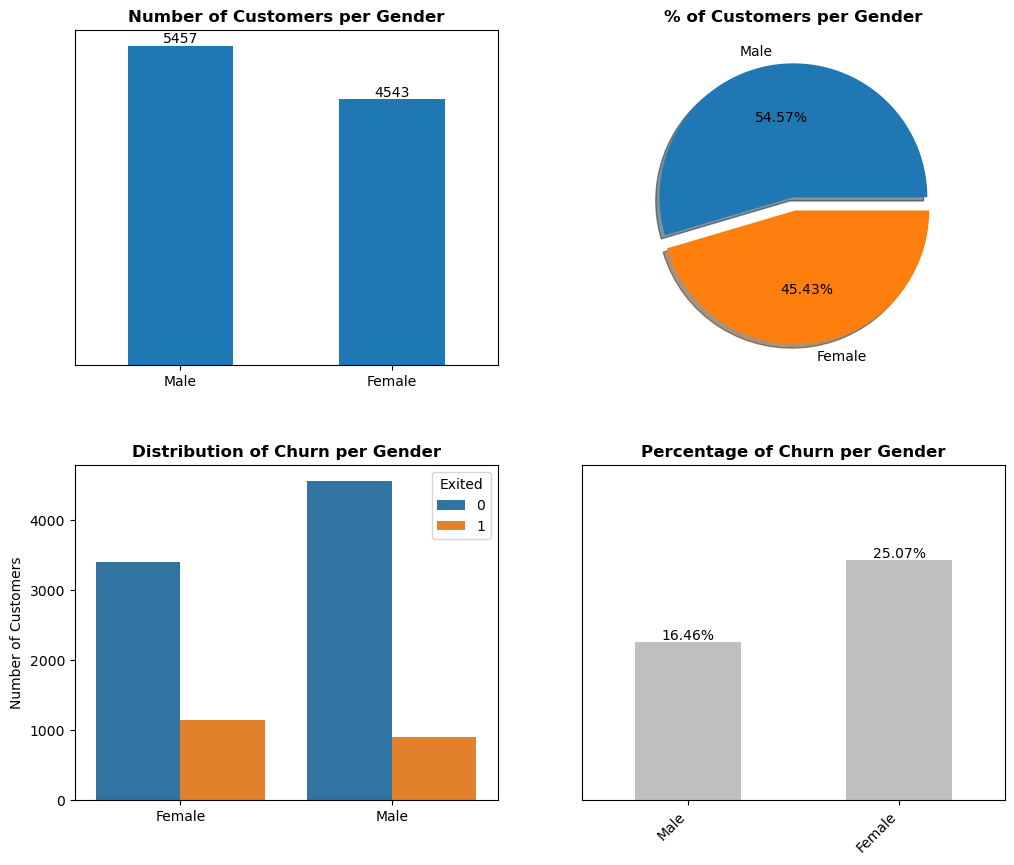

In [82]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=.3)

plt.subplot(2,2,1)
temp_data['Gender'].value_counts().plot(kind='bar')
for i, val in enumerate(temp_data['Gender'].value_counts().values):
    plt.text(i, val, f"{val}", ha='center', va='bottom')
plt.yticks([])
plt.xticks(rotation=0)
plt.xlabel('')
plt.title("Number of Customers per Gender", weight='bold')

# pie chart for Customer per Country
plt.subplot(2,2,2)
temp_data['Gender'].value_counts().plot(kind='pie', explode=[0,0.1], autopct='%1.2f%%', shadow=True)
plt.ylabel('')
plt.title("% of Customers per Gender", weight='bold')

# chart for Distribution of Churn per country
plt.subplot(2,2,3)
sns.countplot(data=temp_data, x='Gender', hue=target)
plt.title("Distribution of Churn per Gender", weight='bold')
plt.ylabel('Number of Customers')
plt.xlabel('')

plt.subplot(2,2,4)
color = ['grey', 'grey', 'red']
employee_churn_gender.plot(kind='bar', color=color, alpha=0.5)
for i, val in enumerate(employee_churn_gender.values):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom')
plt.yticks([])
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.title("Percentage of Churn per Gender", weight='bold')
plt.ylim(0,35)


plt.show()

From our exploration above, we see that most customers are from France taking up 50 percent of all the customers, Germany and Spain has about the same number of customers. Germany has the most record of customers that left the business recording about 32% of customers.

Note: There are no rare labels in the selected categorical variables. Only the column "Surname" has high cardinality and it will be dropped from the dataset.

**Numerical Variables**

Getting the distribution of numerical variables

In [69]:
print(data[num_data].info())
print()
data[num_data].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 781.4 KB
None



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


We notice that there are some discrete variables as part of our numerical variables. Also we do not need the variables "RowNumber" and "CustomerId" as they do not add any information for the algorithm to work on.

In [70]:
temp_data_num = data[num_data].drop(columns=['RowNumber', 'CustomerId'])
discrete_var = [var for var in temp_data_num.columns if temp_data_num[var].unique().max() < 20 ]
cont_var = [var for var in temp_data_num.columns if var not in discrete_var]

In [94]:
def diagnostic_plots(df, var):
    # the function takes a dataframe (df) 
    # also takes the variable of interest as an arguement
    
    # get skew value
    skew_value = df[var].skew()
    # define figure size
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,3,1)
    sns.histplot(df[var], bins=30, kde=True, label= f"skew_value: {skew_value:.1f}")
    plt.title("Histogram")
    plt.legend()
    # Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.ylabel("RM quantiles")
                
    # box plot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[var])
    plt.title("Box Plot")
    
    
    plt.show()
    

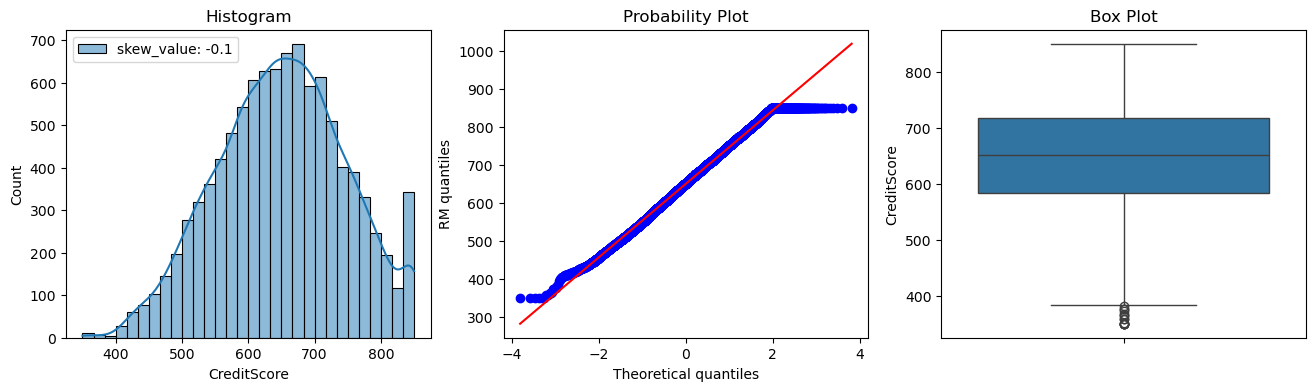

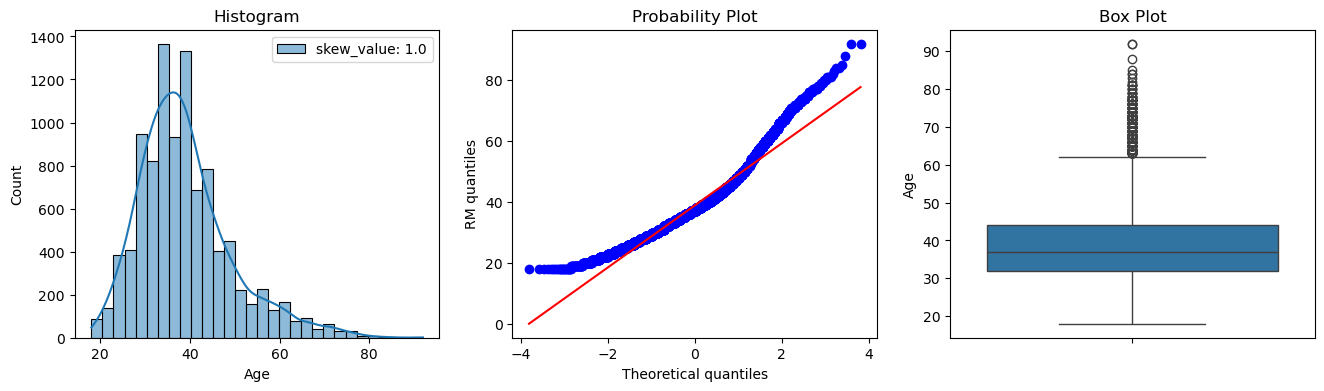

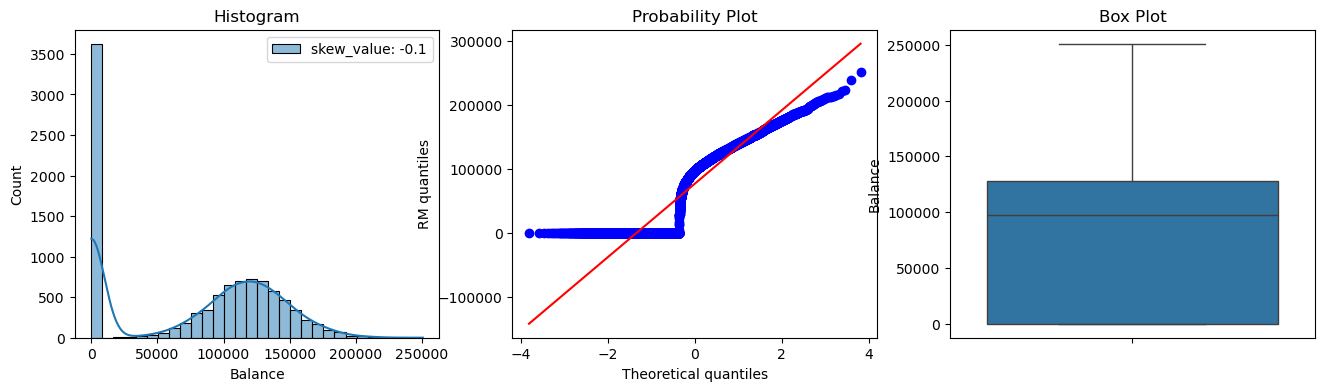

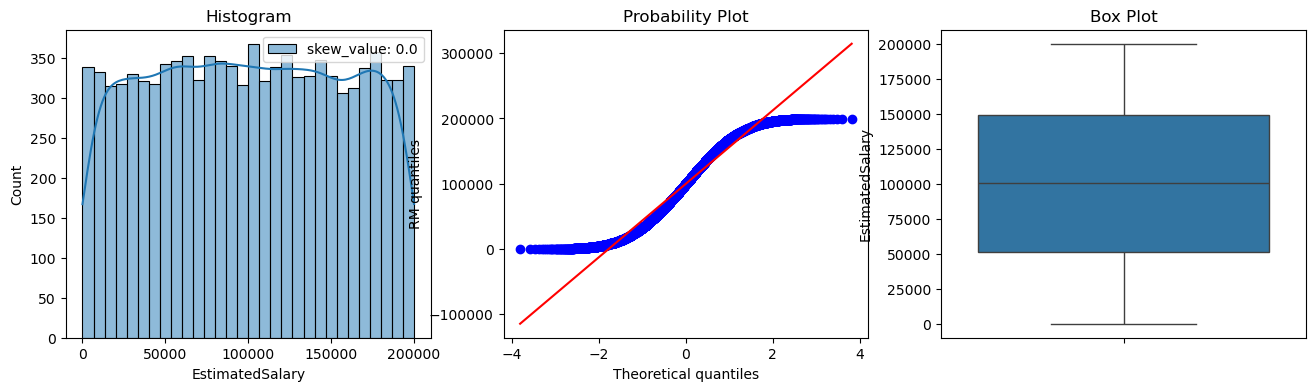

In [95]:
for var in cont_var:
    diagnostic_plots(temp_data_num, var)

From the above distribution of continuous variables, We can see the following information about the variables

- CreditScore: A little skewed and has small number of outliers
- Age: Higly skewed and has a lot of outliers
- Balance: Has a lot of Zeros and slightly skewed
- EstimatedSalary:Almost uniformly distributed

In [179]:
# Analyzing the variable Balance

# getting the percentage of customers with zero balance
cust_with_zero_balaace = temp_data_num.query("Balance==0").shape[0] / len(temp_data_num) * 100
print("percentage of customers with zero balance: ", 36, "%")

percentage of customers with zero balance:  36 %


In [182]:
# create a column to show wether a customer has balance or not
temp_data_num["is_balance"] = np.where(temp_data_num['Balance']==0, 0,1)
temp_data_num[['Balance', 'is_balance']].head()

,Balance,is_balance
0,0.00,0
1,83807.86,1
2,159660.80,1
3,0.00,0
4,125510.82,1


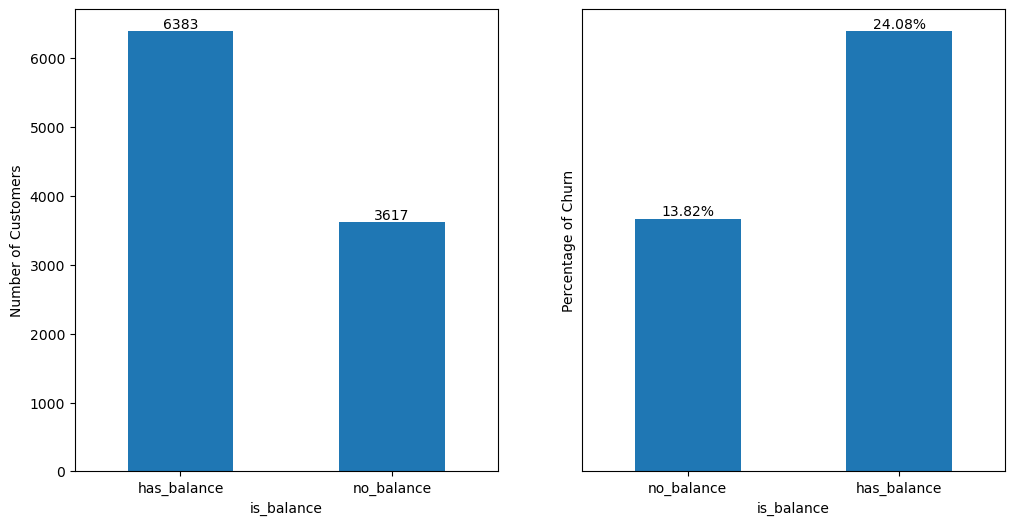

In [209]:
balance_churn = temp_data_num.groupby('is_balance')['Exited'].mean().rename(index={0:"no_balance", 1:"has_balance"}) *100

balance_dist = temp_data_num['is_balance'].map({0:"no_balance", 1: "has_balance"}).value_counts()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
balance_dist.plot(kind='bar')
for i, val in enumerate(balance_dist.values):
    plt.text(i, val, f"{val}", ha='center', va='bottom')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
balance_churn.plot(kind='bar')
for i, val in enumerate(balance_churn.values):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom')
plt.yticks([])
plt.xticks(rotation=0)
plt.ylabel("Percentage of Churn")
plt.show()

In [222]:
temp_data_num.query("Exited==1").head()['is_balance'].value_counts(normalize=True)

is_balance
1    0.8
0    0.2
Name: proportion, dtype: float64

In [240]:
corr_with_target

Balance       0.118533
is_balance    0.122357
dtype: float64

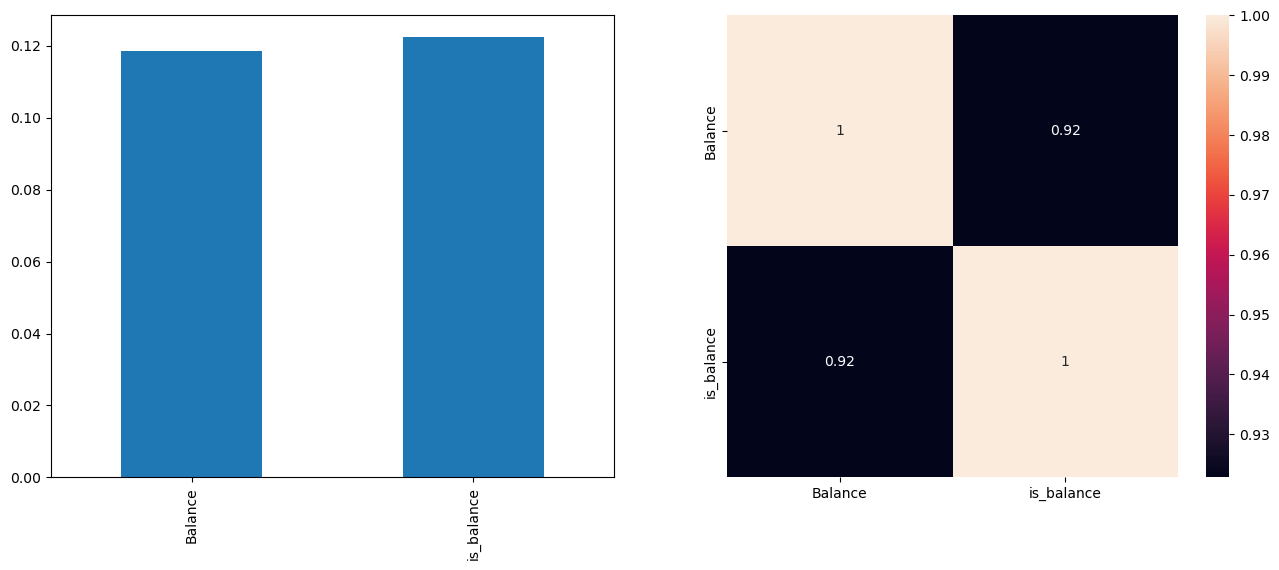

In [214]:
# showing the correlation between Balance, is_balance and target variable, Exited
balance_corr = temp_data_num[['Balance', 'is_balance']].corr()
corr_with_target = temp_data_num[['Balance', 'is_balance']].corrwith(temp_data_num[target])

fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(balance_corr, annot=True, ax=ax[1])
corr_with_target.plot(kind='bar', ax=ax[0])

plt.show()

Exploring the Balance variable:
- we created a discretized variable from Balance variable and named it is_balance
- from the correlation constant diagram, we confirm that both variables carries the same information
- 36% of customers have no balance
- Both variables also have the same correlation constant with the target variable
- we found that, of those who left (churned) 80% of them had balance.
- we also found that, of all those who had balance 24% of them left, of all those who had no balance only about 14% of them left


In [161]:
def discrete_var_xploration(df, var):
    plt.figure(figsize=(16,6))
    # get Series for percentage per number of product
    dist_temp_df = (df[var].value_counts(normalize=True)*100).sort_values(ascending=False)
    
    # getting percentage of churn
    num_perc_of_churn = (df.groupby(var)[target].mean() * 100).sort_values()
    
    # creating a bar plot
    plt.subplot(1,2,1)
    # assigning color Logically
    color = ['gray' if dist_temp_df[index] > 5 else 'red' for index in dist_temp_df.index]
    dist_temp_df.plot(kind='bar', color=color, label="Red-bar: Rare Label")

    for i, val in enumerate(dist_temp_df.values):
        plt.text(i, val, f"{val:.1f}%", ha='center', va='bottom')
    
    # getting an horizontal line to indicate labels under/above 5% threashold
    plt.axhline(y=5, color='red', alpha=0.3, label="Threshold: 5%")
    plt.ylabel(f"Percentage of {var}")
    plt.yticks([])

    plt.legend()
    
    plt.subplot(1,2,2)
    num_perc_of_churn.plot(kind='bar')
    for i, value in enumerate(num_perc_of_churn.values):
        plt.text(i, value, f"{value:.1f}%", ha='center', va='bottom')

    plt.title("Percentage of Churn")
    plt.yticks([])
    
    plt.show()

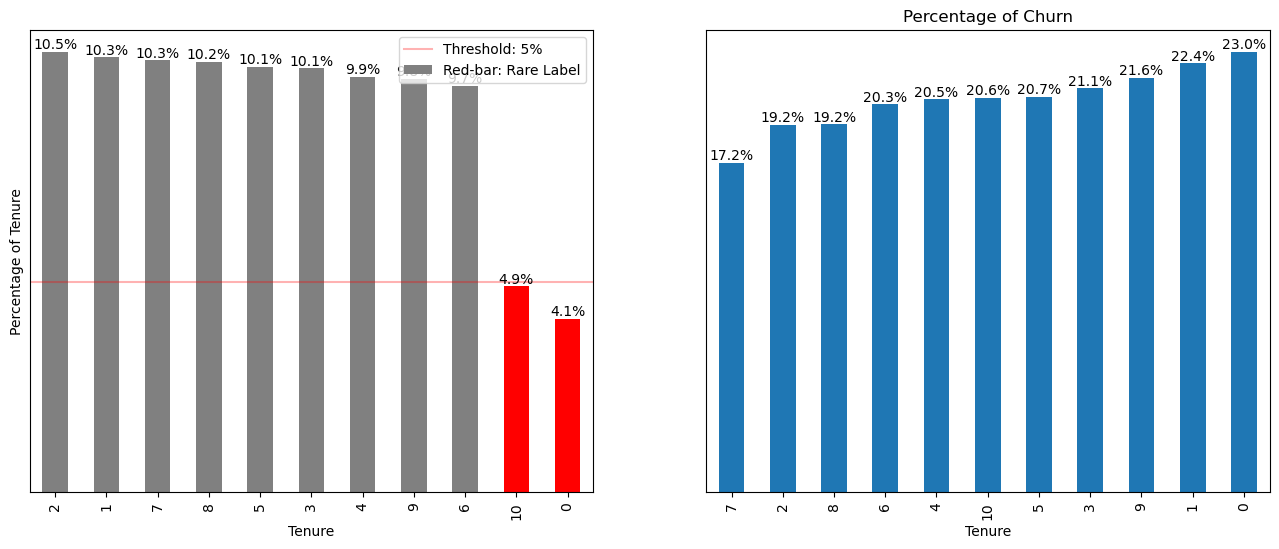

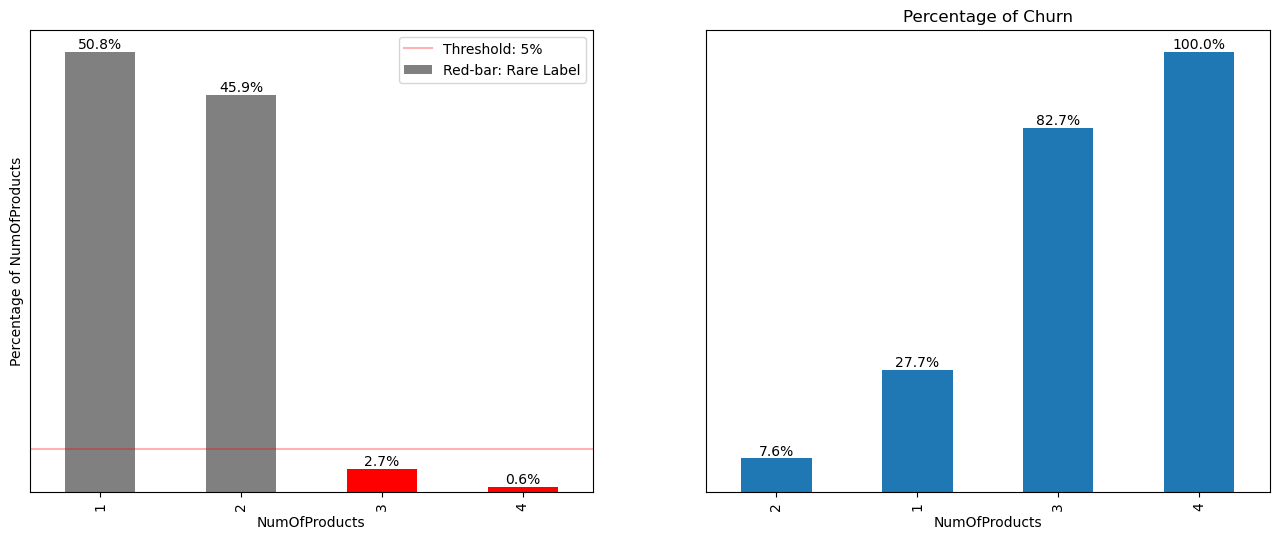

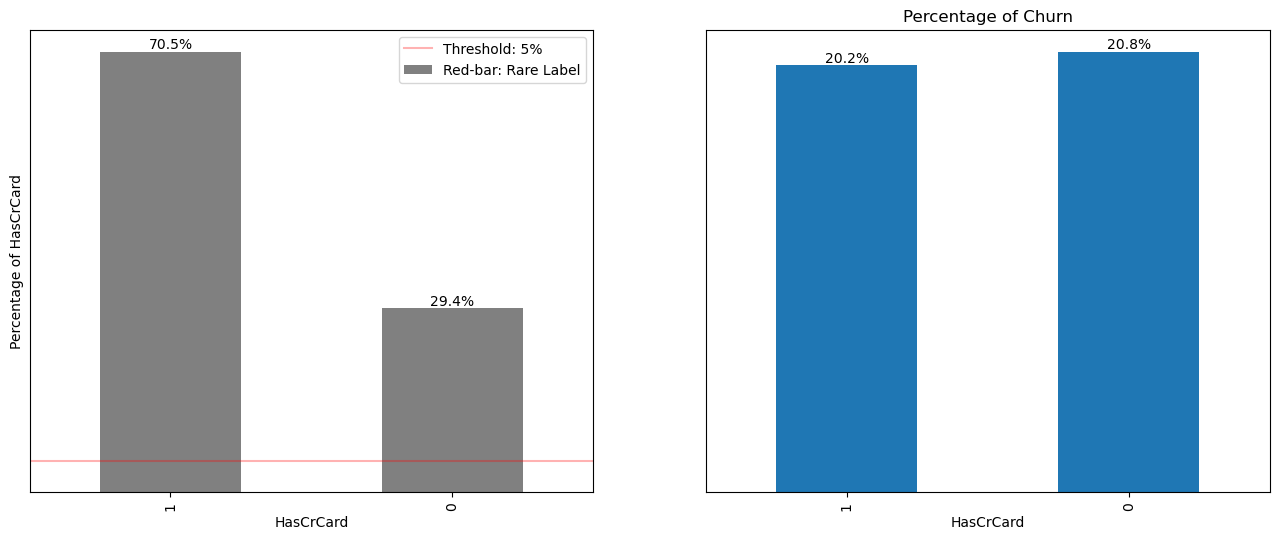

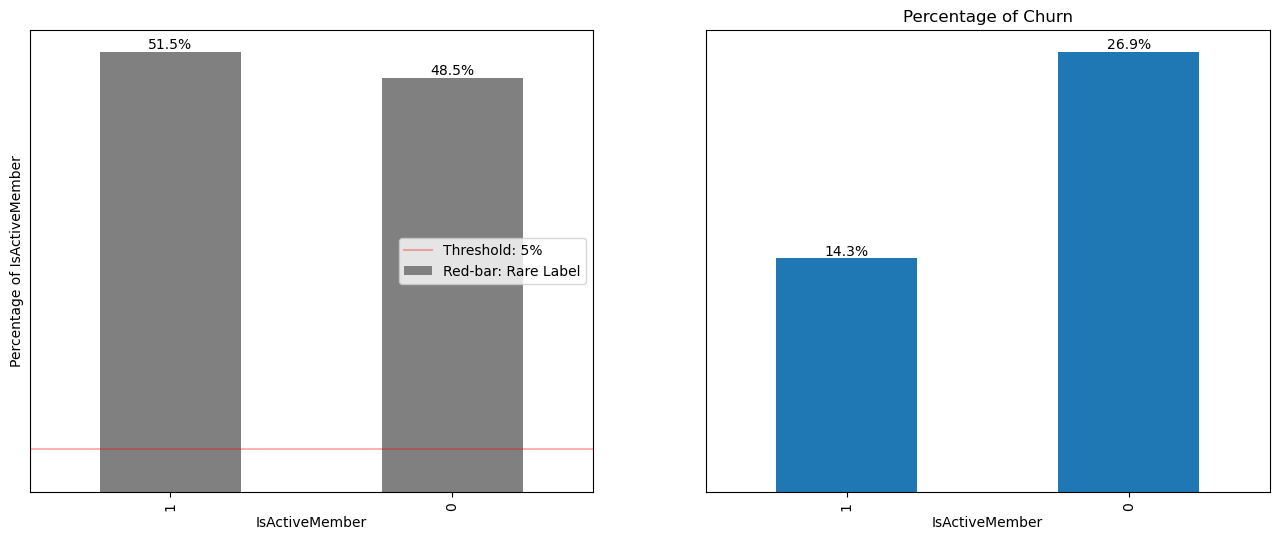

In [162]:
for var in discrete_var:
    discrete_var_xploration(temp_data_num, var)

**Discrete Variables:**
- Tenure: Most tenure has almost the same number of customer, almost the same number of customers who left
- NumberOfProducts: customers with number of product 3 and 4 are less than 5% and most of them left. Most customer holds 1 or 2 number of product and we see that most customers with one product left.
- HasCrCard: About 80% of the customers has credit card and we see that more of them left compare to customers with no credit card.
- IsActiveMenmber: We see almost the same number of customers the group "active members" and "not active member". Most of the members that are not active left (churn)

In [230]:
def age_cat(x):
    if (x >= 18) & (x <=25):
        r = "18-25"
    elif (x >= 26) & (x <=35):
        r = "26-35"
    elif (x >= 36) & (x <=45):
        r = "36-45"
    elif (x >= 46) & (x <=55):
        r = "46-55"
    elif (x >= 56) & (x <=65):
        r = "56-65"
    elif (x >= 76) & (x <=85):
        r = "66-75"
    elif (x >= 76) & (x <=85):
        r = "76-85"
    else:
        r = '86_above'
    return r

In [232]:
temp_data_num.drop('Age_bin', axis=1, inplace=True)
age_bin = temp_data_num['Age'].apply(age_cat)
temp_data_num.insert(2, "Age_bin",age_bin)
temp_data_num.head()

,CreditScore,Age,Age_bin,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,is_balance
0,619,42,36-45,2,0.00,1,1,1,101348.88,1,0
1,608,41,36-45,1,83807.86,1,0,1,112542.58,0,1
2,502,42,36-45,8,159660.80,3,1,0,113931.57,1,1
3,699,39,36-45,1,0.00,2,0,0,93826.63,0,0
4,850,43,36-45,2,125510.82,1,1,1,79084.10,0,1


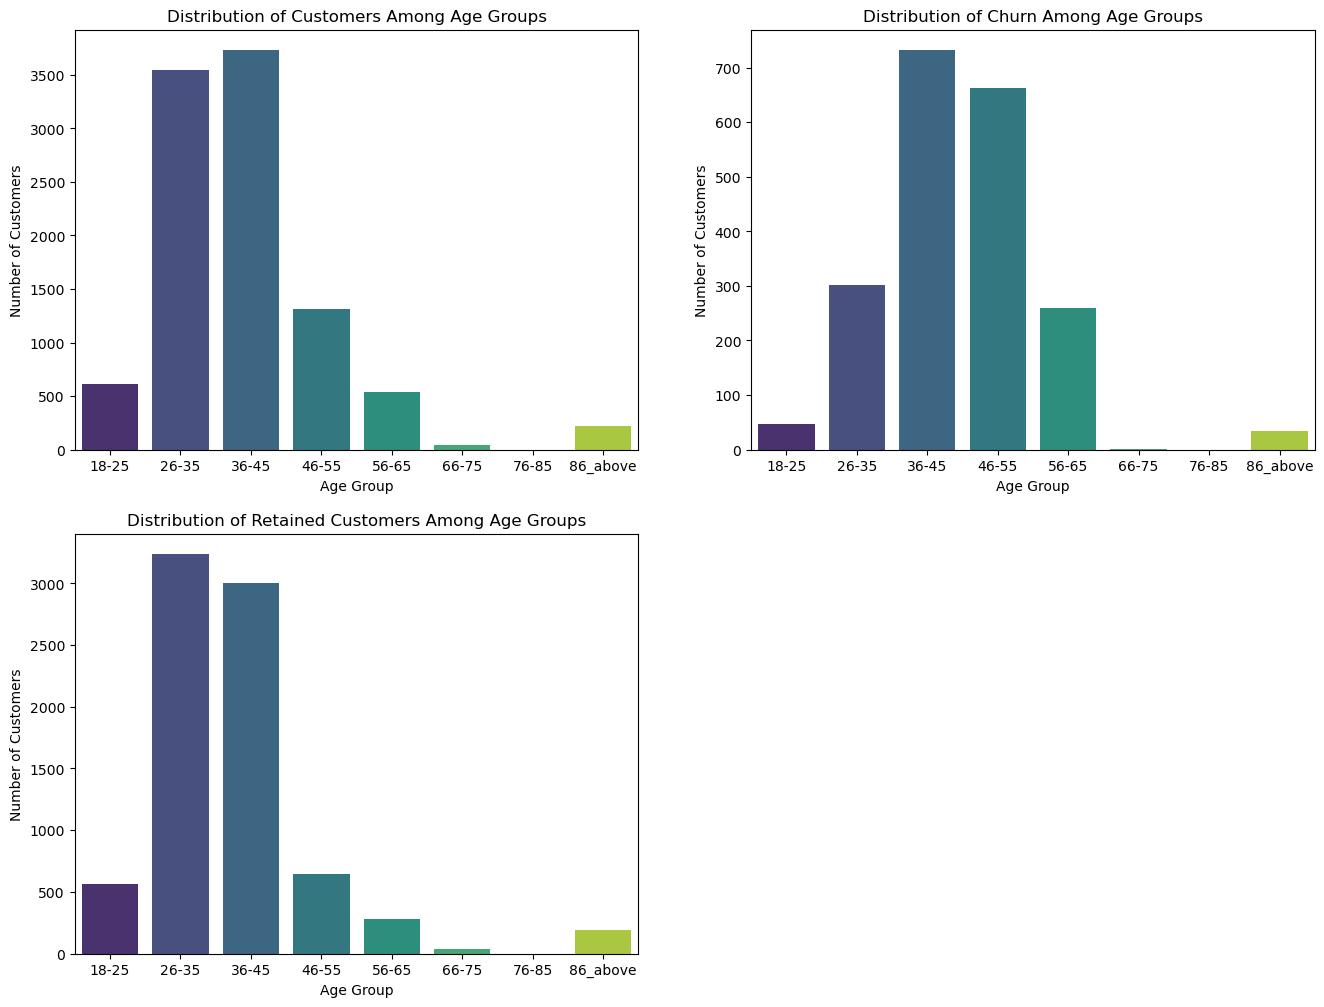

In [245]:
order = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86_above']
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.countplot(data=temp_data_num, x='Age_bin', order=order, palette='viridis')
plt.ylabel("Number of Customers")
plt.xlabel("Age Group")
plt.title("Distribution of Customers Among Age Groups")

plt.subplot(2,2,2)
sns.countplot(data=temp_data_num.query("Exited==1"), x='Age_bin', order=order, palette='viridis')
plt.ylabel("Number of Customers")
plt.xlabel("Age Group")
plt.title("Distribution of Churn Among Age Groups")


plt.subplot(2,2,3)
sns.countplot(data=temp_data_num.query("Exited==0"), x='Age_bin', order=order, palette='viridis')
plt.ylabel("Number of Customers")
plt.xlabel("Age Group")
plt.title("Distribution of Retained Customers Among Age Groups")


plt.show()

**Age Distribution**:
- Most customers are in the age range 26-45
- Most customer who left are in the age range of 36-55
- Most customers the business was able to retain falls under the age range 26-45

**Continuous Variable Transformation**

In [254]:
cont_transformed = temp_data_num[cont_var].copy()
for var in cont_var:
    cont_transformed[var] = np.log1p(cont_transformed[var])

cont_transformed.head()    

,CreditScore,Age,Balance,EstimatedSalary
0,6.429719,3.761200,0.000000,11.526334
1,6.411818,3.737670,11.336294,11.631096
2,6.220590,3.761200,11.980813,11.643362
3,6.551080,3.688879,0.000000,11.449215
4,6.746412,3.784190,11.740155,11.278280


The last thing I really want to check is if log transformation will help improve the skewed continuous variables

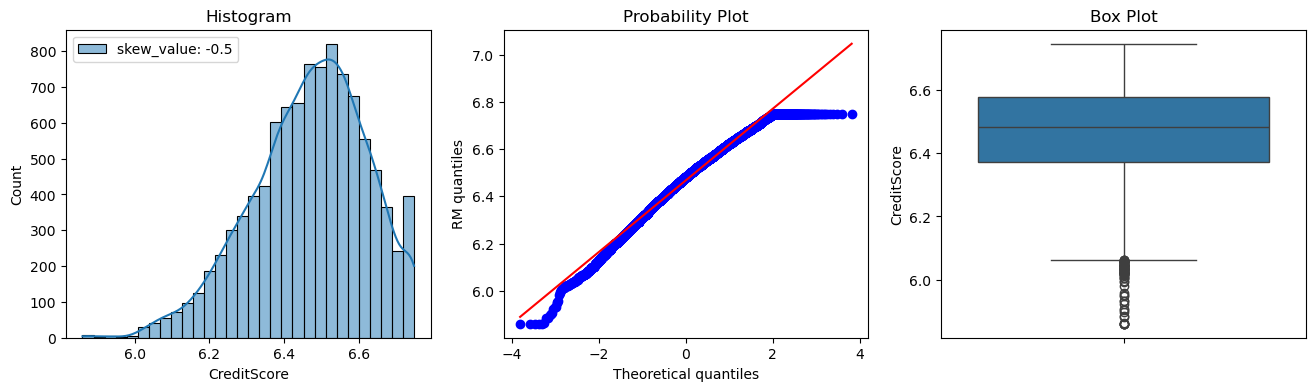

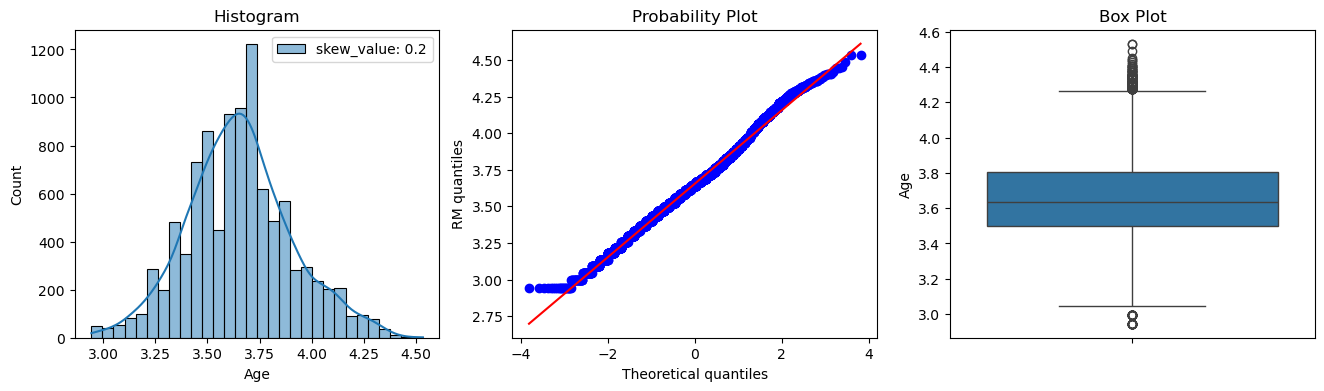

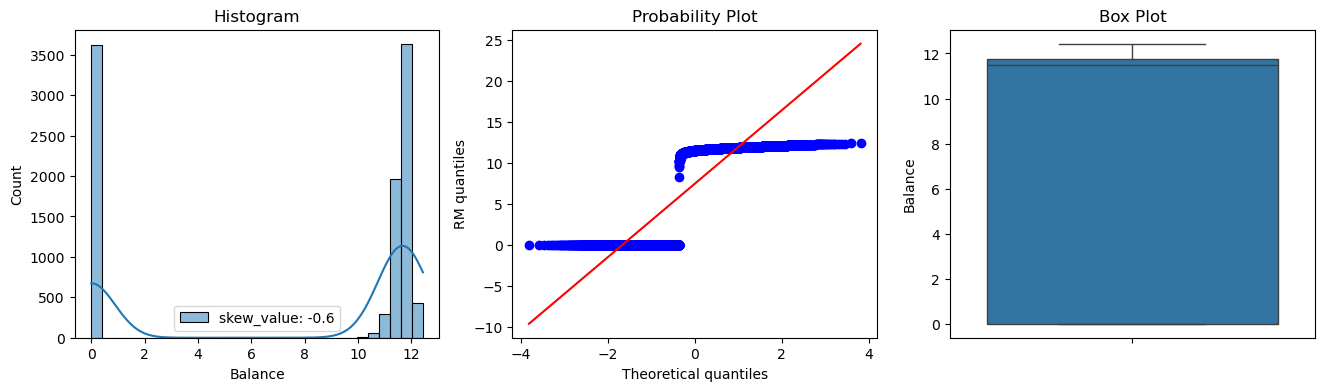

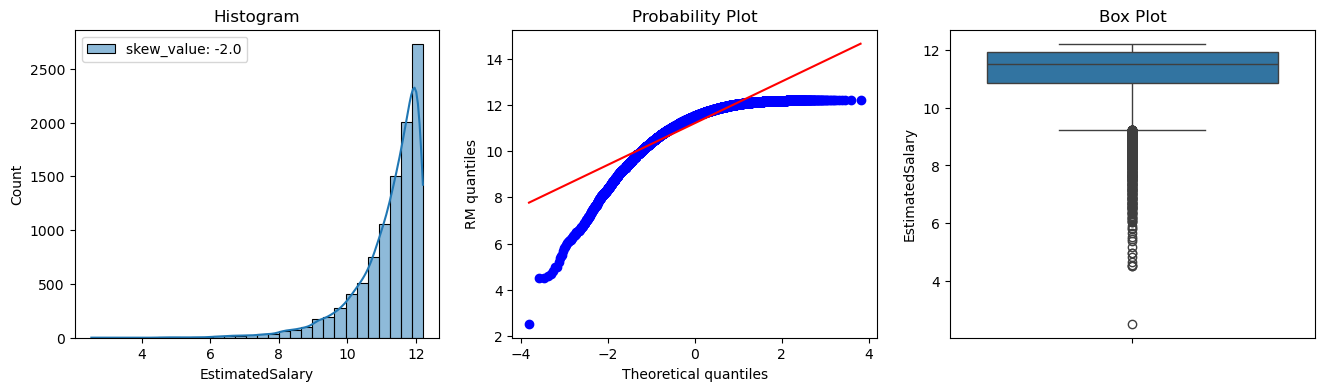

In [251]:
for var in cont_var:
    diagnostic_plots(cont_transformed, var)

The transformation only helped with the Age input variable making it look more normally distributed.

In [255]:
!git add. 

git: 'add.' is not a git command. See 'git --help'.

The most similar command is
	add
